In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def my_barh(df, var, group_names, value):
    n=df[var].count()
    if value=='pros':
        df1=pd.crosstab(index=df[var],columns='prosenttia',normalize='columns')
        df1.index = group_names
        ax=df1.plot(kind='barh', width=0.8, facecolor='maroon', legend = False)
        ax.set_xlabel('prosenttia (n='+str(n)+')')
        vals = ax.get_xticks()
        ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals])
    else:
        df1=pd.crosstab(index=df[var],columns='lkm')
        df1.index = group_names
        ax=df1.plot(kind='barh', width=0.8, facecolor='maroon', legend = False)
        ax.set_xlabel('lkm (n='+str(n)+')')
    df1.columns.name=''
    return(ax, df1)

def my_histogram(df, var, bins, group_names, value):
    df['omat_luokat'] = pd.cut(df[var], bins, labels=group_names, right=False)
    if value=='pros':
        df1=pd.crosstab(df['omat_luokat'],'prosenttia',normalize='columns')
        df1.style.format('{:.1%}')
        ax=df1['prosenttia'].plot(kind='bar', width=1.0, facecolor='grey',edgecolor='black',legend=None)
        plt.ylabel('prosenttia')
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
    else:
        df1=pd.crosstab(df['omat_luokat'],'lkm')
        ax=df1['lkm'].plot(kind='bar', width=1.0, facecolor='grey',edgecolor='black',legend=None)
        plt.ylabel('lkm')
    plt.xlabel(var)
    plt.xticks(rotation=0)
    df1.columns.name=''
    return(ax, df1)
    
def my_boxplot(df, var, by, group_names):
    ax=df.boxplot(column=var, by=by)
    ax.set_xticklabels(group_names)
    ax.set_ylabel(var)
    ax.set_title('')
    plt.suptitle('')
    return(ax)

def my_scatter(df, x, y):
    ax=df.plot(kind='scatter',x=x,y=y)
    return(ax)

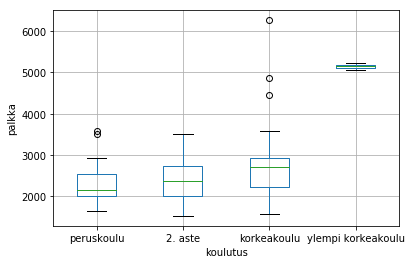

In [3]:
df=pd.read_csv('http://www.elisanet.fi/taanila/data1.csv',delimiter=';')
group_names=['peruskoulu','2. aste', 'korkeakoulu','ylempi korkeakoulu']
ax=my_boxplot(df,'palkka','koulutus',group_names)
plt.show()

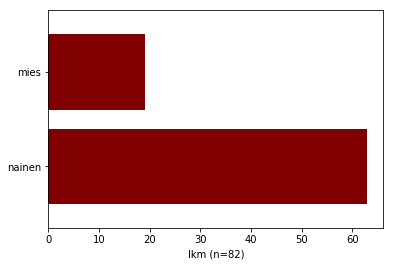

,lkm
nainen,63
mies,19


In [4]:
ax, df1=my_barh(df,'sukupuoli',['nainen', 'mies'],'lkm')
plt.show()
df1

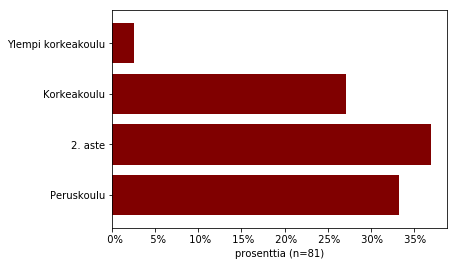

,prosenttia
Peruskoulu,0.333333
2. aste,0.370370
Korkeakoulu,0.271605
Ylempi korkeakoulu,0.024691


In [5]:
group_names = ['Peruskoulu', '2. aste', 'Korkeakoulu','Ylempi korkeakoulu']
ax, df1=my_barh(df,'koulutus',group_names,'pros')
plt.show()
df1

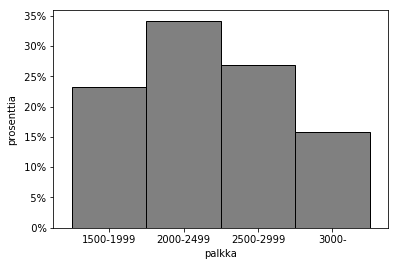

,prosenttia
omat_luokat,
1500-1999,0.231707
2000-2499,0.341463
2500-2999,0.268293
3000-,0.158537


In [6]:
bins = [1500, 2000, 2500, 3000, 7000]
group_names = ['1500-1999', '2000-2499', '2500-2999', '3000-']
ax, df1=my_histogram(df, 'palkka', bins, group_names, 'pros')
plt.show()
df1

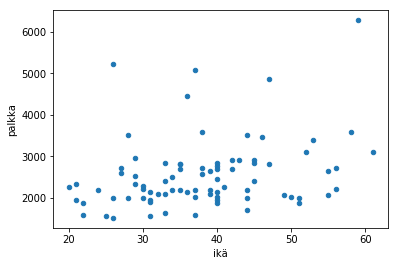

In [7]:
ax=my_scatter(df,'ikä','palkka')
plt.show()

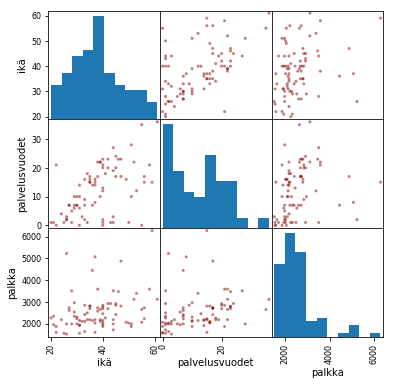

In [8]:
from pandas.plotting import scatter_matrix
df1=df[['ikä','palvelusvuodet','palkka']]
scatter_matrix(df1, figsize=(6,6), alpha=0.5, color='maroon', diagonal= 'hist')
plt.show()